# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

Se proponen dos objetivos: 
1. Predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.
2. Predecir el volúmen de precipitaciones (columna *Rainfall* ), en función de los datos meteorológicos restantes.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. Todos los puntos analizarlos para los dos problemas planteados.
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Para cada uno de los problemas propuestos, defina una lista de modelos candidatos a entrenar. Justifique sus elecciones. 

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# 1. Análisis exploratorio inicial
Visualizar las primeras filas.

In [280]:
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [282]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [283]:
print(df.dtypes)

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


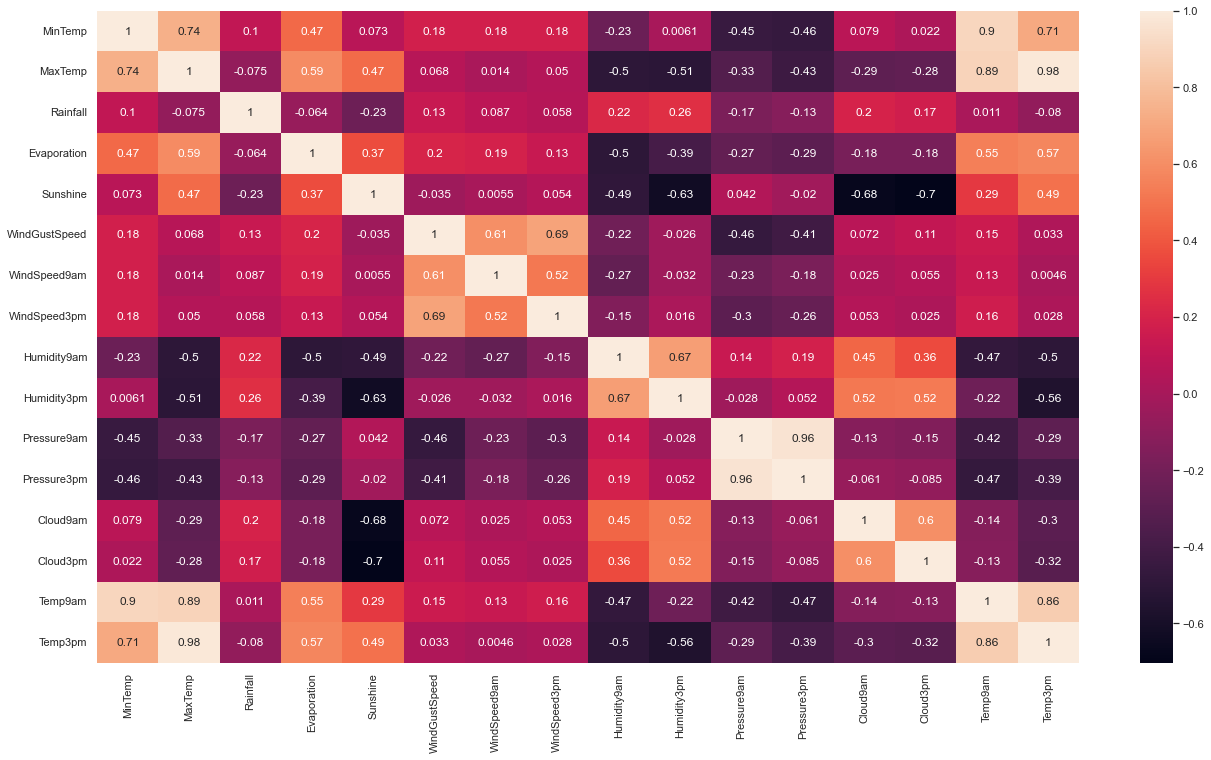

In [284]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True);

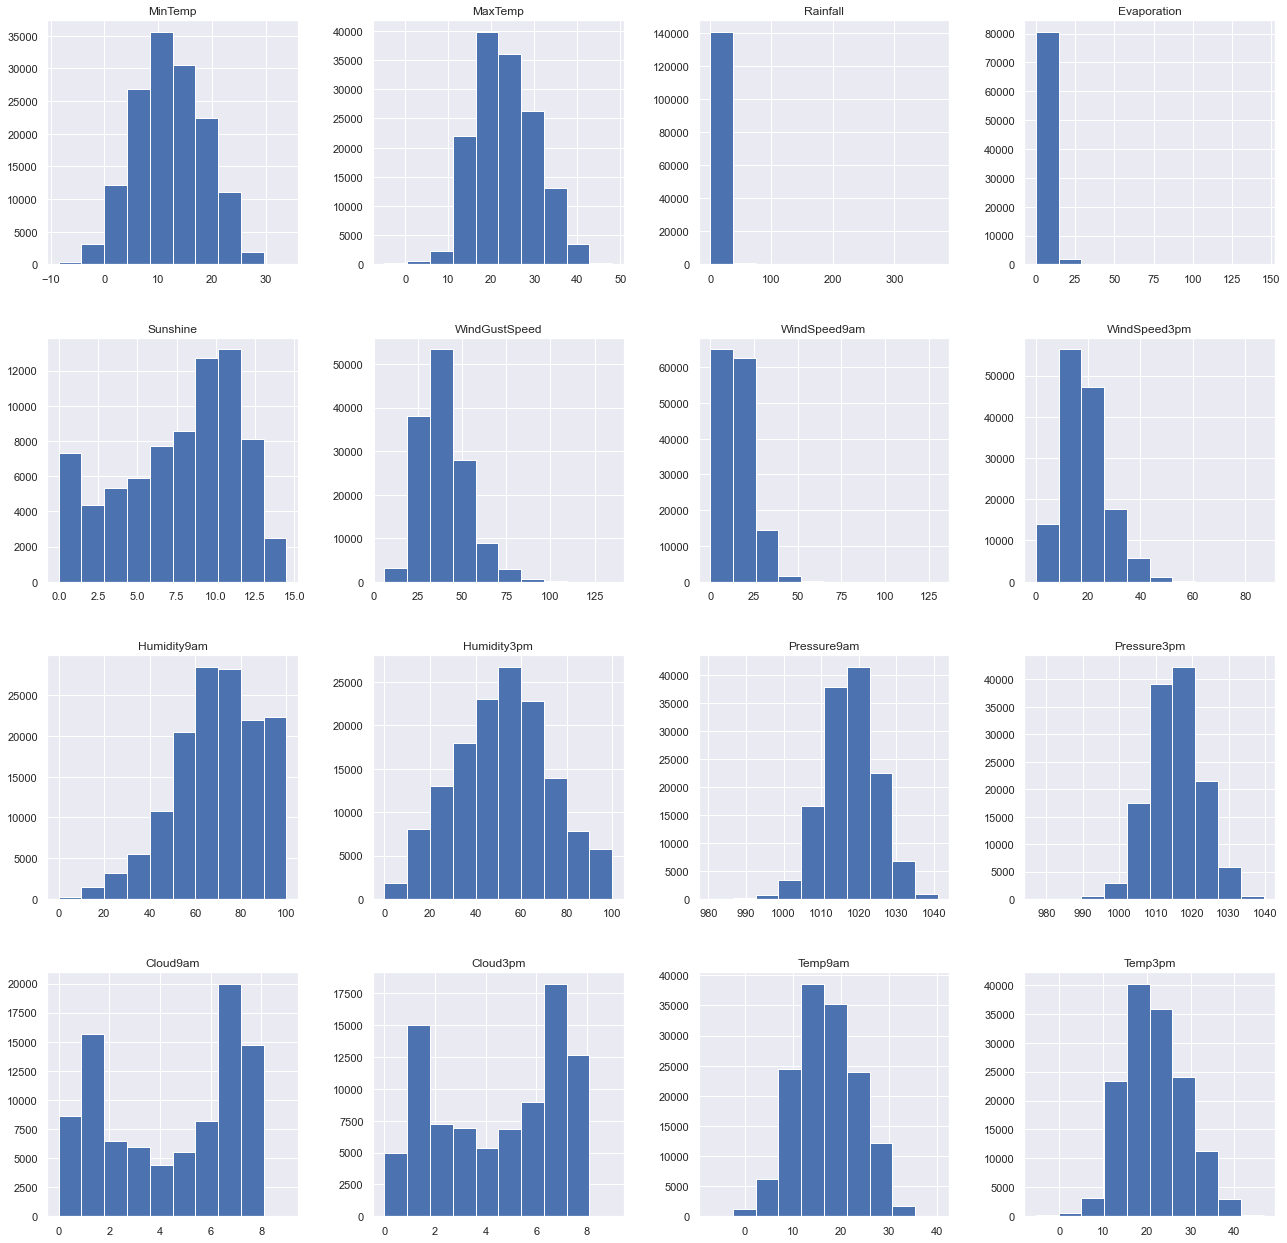

In [285]:
df.hist(figsize=(22,22));

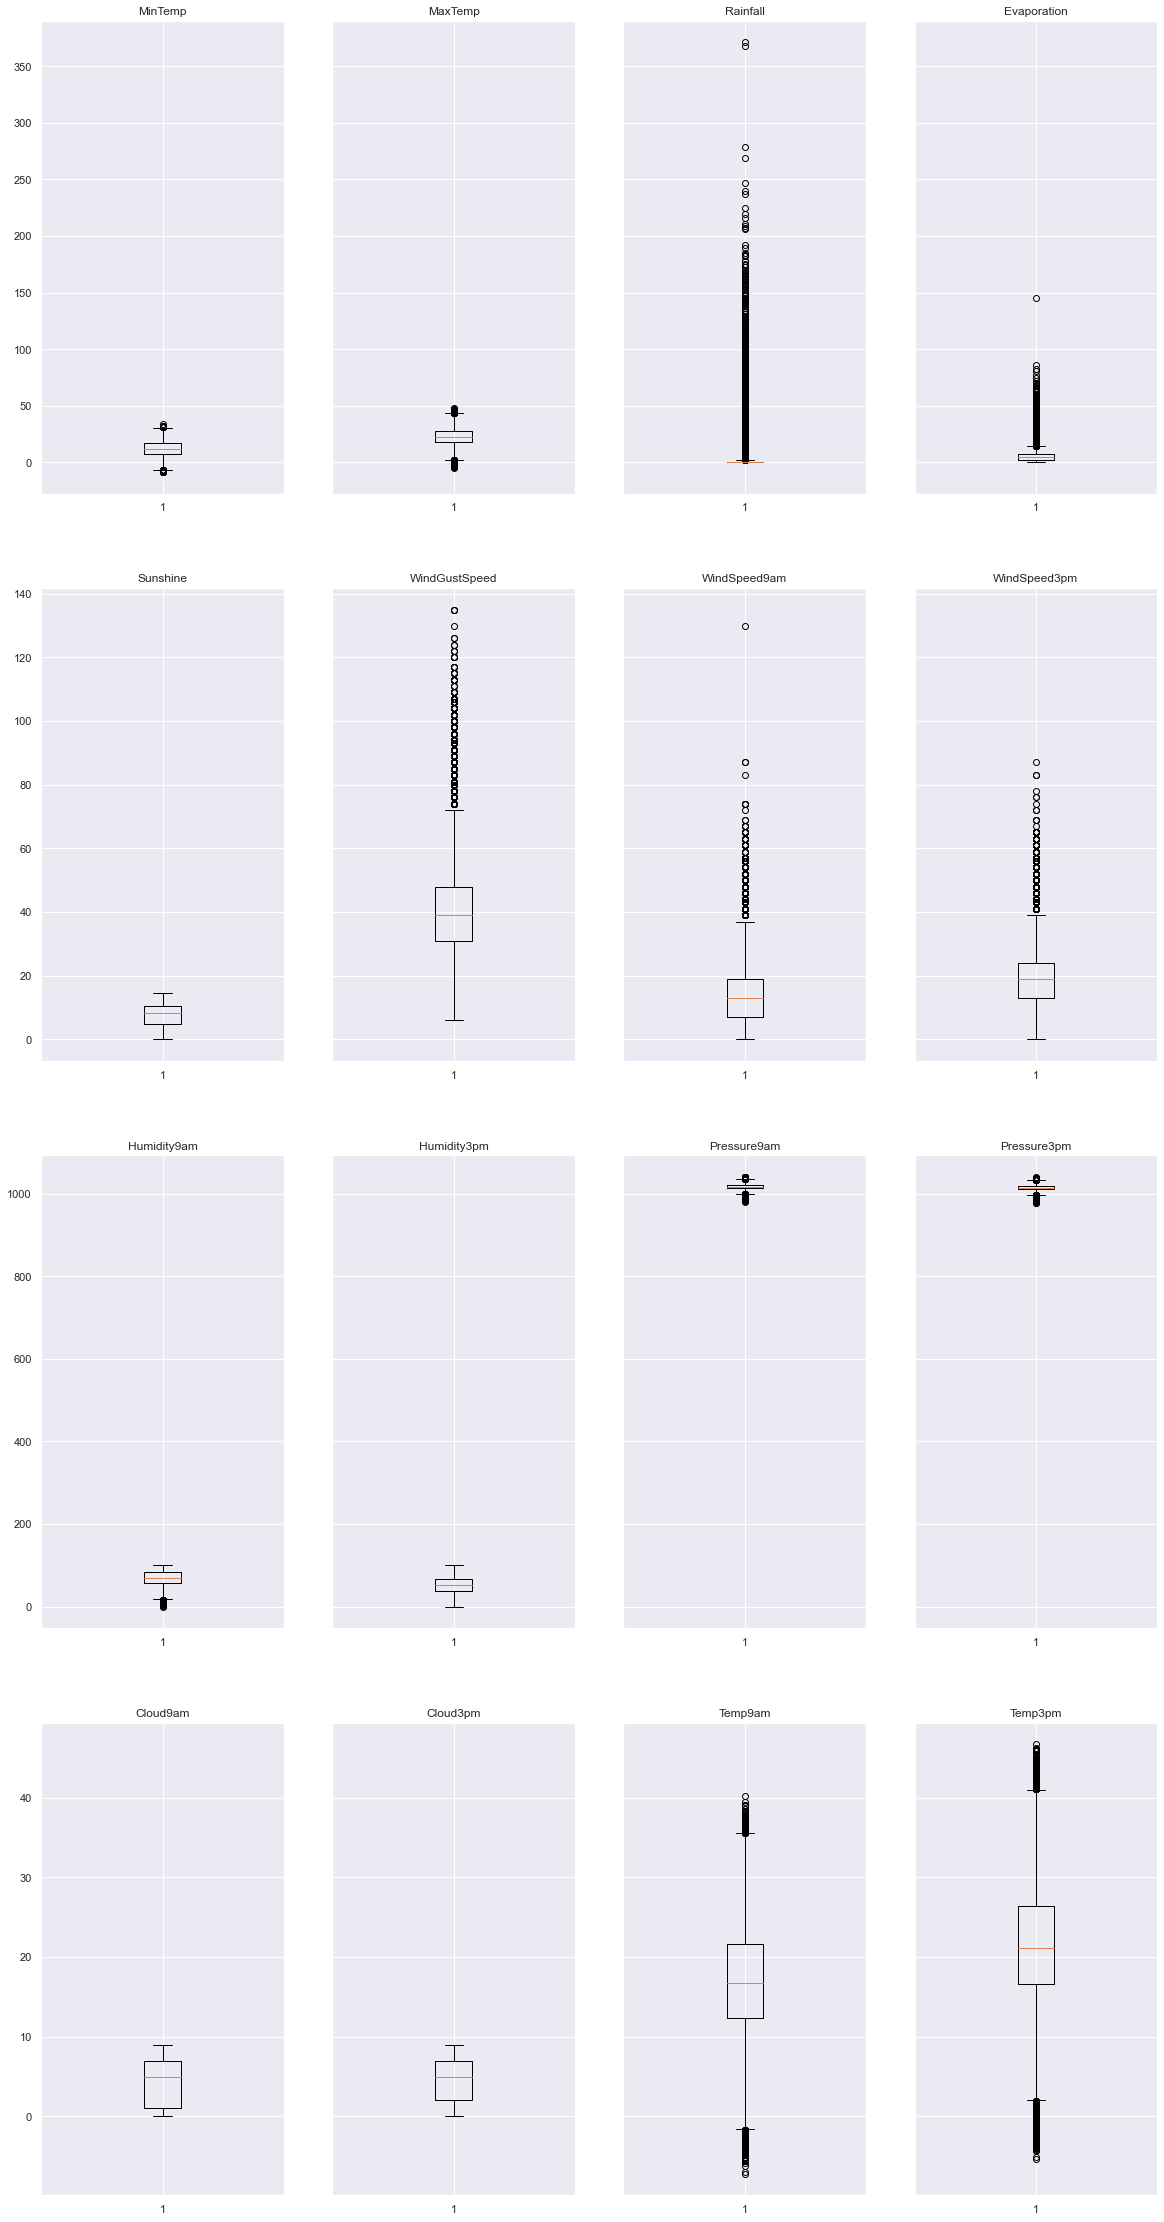

In [286]:
fig, ax = plt.subplots(4, 4, sharey='row', figsize=(20,40))
ax[0,0].boxplot(df.loc[df['MinTemp'].isna()==False, 'MinTemp'])
ax[0,0].set_title('MinTemp')

ax[0,1].boxplot(df.loc[df['MaxTemp'].isna()==False, 'MaxTemp'])
ax[0,1].set_title('MaxTemp')

ax[0,2].boxplot(df.loc[df['Rainfall'].isna()==False, 'Rainfall'])
ax[0,2].set_title('Rainfall')

ax[0,3].boxplot(df.loc[df['Evaporation'].isna()==False, 'Evaporation'])
ax[0,3].set_title('Evaporation')

ax[1,0].boxplot(df.loc[df['Sunshine'].isna()==False, 'Sunshine'])
ax[1,0].set_title('Sunshine')

ax[1,1].boxplot(df.loc[df['WindGustSpeed'].isna()==False, 'WindGustSpeed'])
ax[1,1].set_title('WindGustSpeed')

ax[1,2].boxplot(df.loc[df['WindSpeed9am'].isna()==False, 'WindSpeed9am'])
ax[1,2].set_title('WindSpeed9am')

ax[1,3].boxplot(df.loc[df['WindSpeed3pm'].isna()==False, 'WindSpeed3pm'])
ax[1,3].set_title('WindSpeed3pm')

ax[2,0].boxplot(df.loc[df['Humidity9am'].isna()==False, 'Humidity9am'])
ax[2,0].set_title('Humidity9am')

ax[2,1].boxplot(df.loc[df['Humidity3pm'].isna()==False, 'Humidity3pm'])
ax[2,1].set_title('Humidity3pm')

ax[2,2].boxplot(df.loc[df['Pressure9am'].isna()==False, 'Pressure9am'])
ax[2,2].set_title('Pressure9am')

ax[2,3].boxplot(df.loc[df['Pressure3pm'].isna()==False, 'Pressure3pm'])
ax[2,3].set_title('Pressure3pm')

ax[3,0].boxplot(df.loc[df['Cloud9am'].isna()==False, 'Cloud9am'])
ax[3,0].set_title('Cloud9am')

ax[3,1].boxplot(df.loc[df['Cloud3pm'].isna()==False, 'Cloud3pm'])
ax[3,1].set_title('Cloud3pm')

ax[3,2].boxplot(df.loc[df['Temp9am'].isna()==False, 'Temp9am'])
ax[3,2].set_title('Temp9am')

ax[3,3].boxplot(df.loc[df['Temp3pm'].isna()==False, 'Temp3pm'])
ax[3,3].set_title('Temp3pm')


plt.show()

In [287]:
#plt.figure(figsize=(22,12))
#plt.boxplot(df.loc[df['Rainfall'].isna()==False, 'Rainfall']);

# DATE
la variable date Tiene tipo de dato datetime

In [288]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [289]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


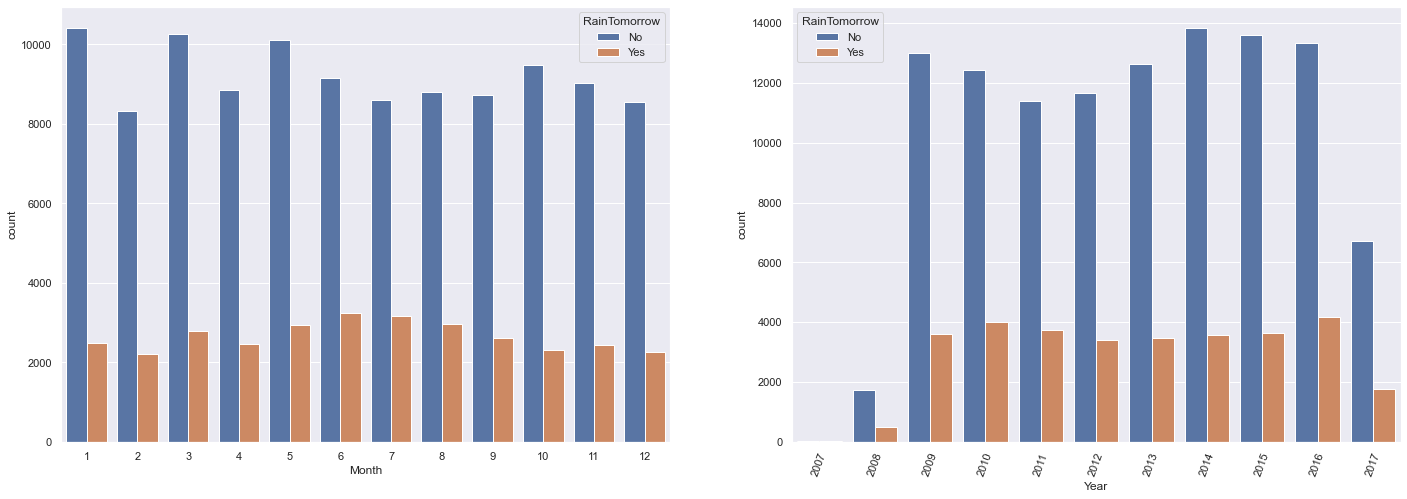

In [290]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
sns.countplot(data=df, x='Month', hue='RainTomorrow', ax = ax[0],)
sns.countplot(data=df, x='Year', hue='RainTomorrow', ax = ax[1],)
plt.xticks(rotation=70)
plt.show()

Aca vemos que en el total acumulado por mes hay un incremento en los meses de mayo a agosto

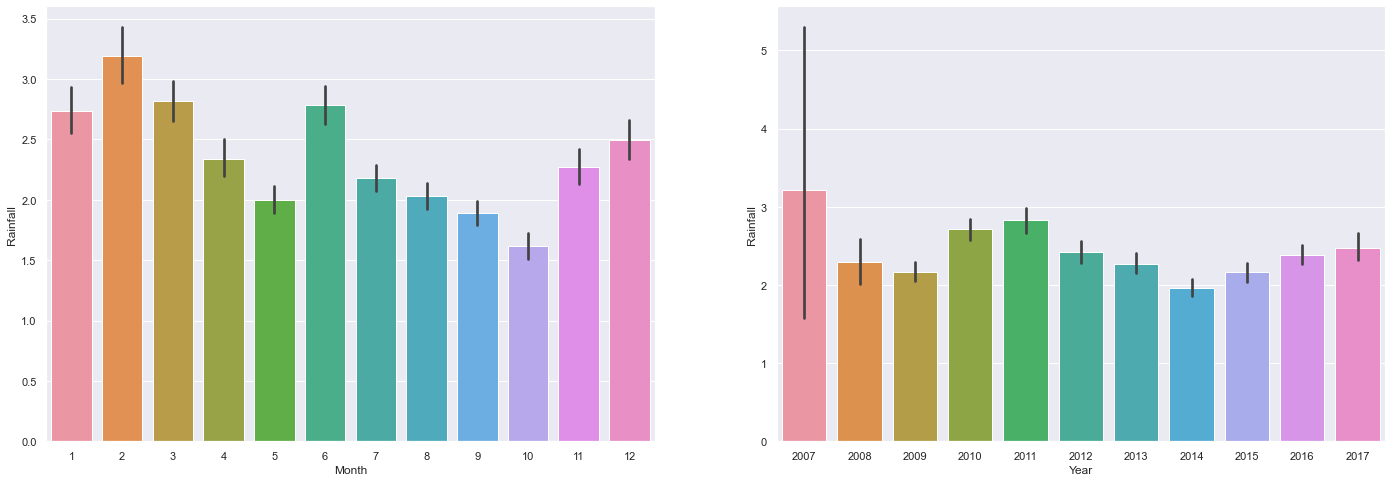

In [291]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

sns.barplot(data=df, x='Month', y='Rainfall', ax = ax[0])
sns.barplot(data=df, x='Year', y='Rainfall', ax = ax[1])
plt.show()

In [292]:
d2007=df.apply(lambda x:x[df['Year']==2007]).reset_index()
d2008=df.apply(lambda x:x[df['Year']==2008]).reset_index()
d2009=df.apply(lambda x:x[df['Year']==2009]).reset_index()
d2010=df.apply(lambda x:x[df['Year']==2010]).reset_index()
d2011=df.apply(lambda x:x[df['Year']==2011]).reset_index()
d2012=df.apply(lambda x:x[df['Year']==2012]).reset_index()
d2013=df.apply(lambda x:x[df['Year']==2013]).reset_index()
d2014=df.apply(lambda x:x[df['Year']==2014]).reset_index()
d2015=df.apply(lambda x:x[df['Year']==2015]).reset_index()
d2016=df.apply(lambda x:x[df['Year']==2016]).reset_index()
d2017=df.apply(lambda x:x[df['Year']==2017]).reset_index()

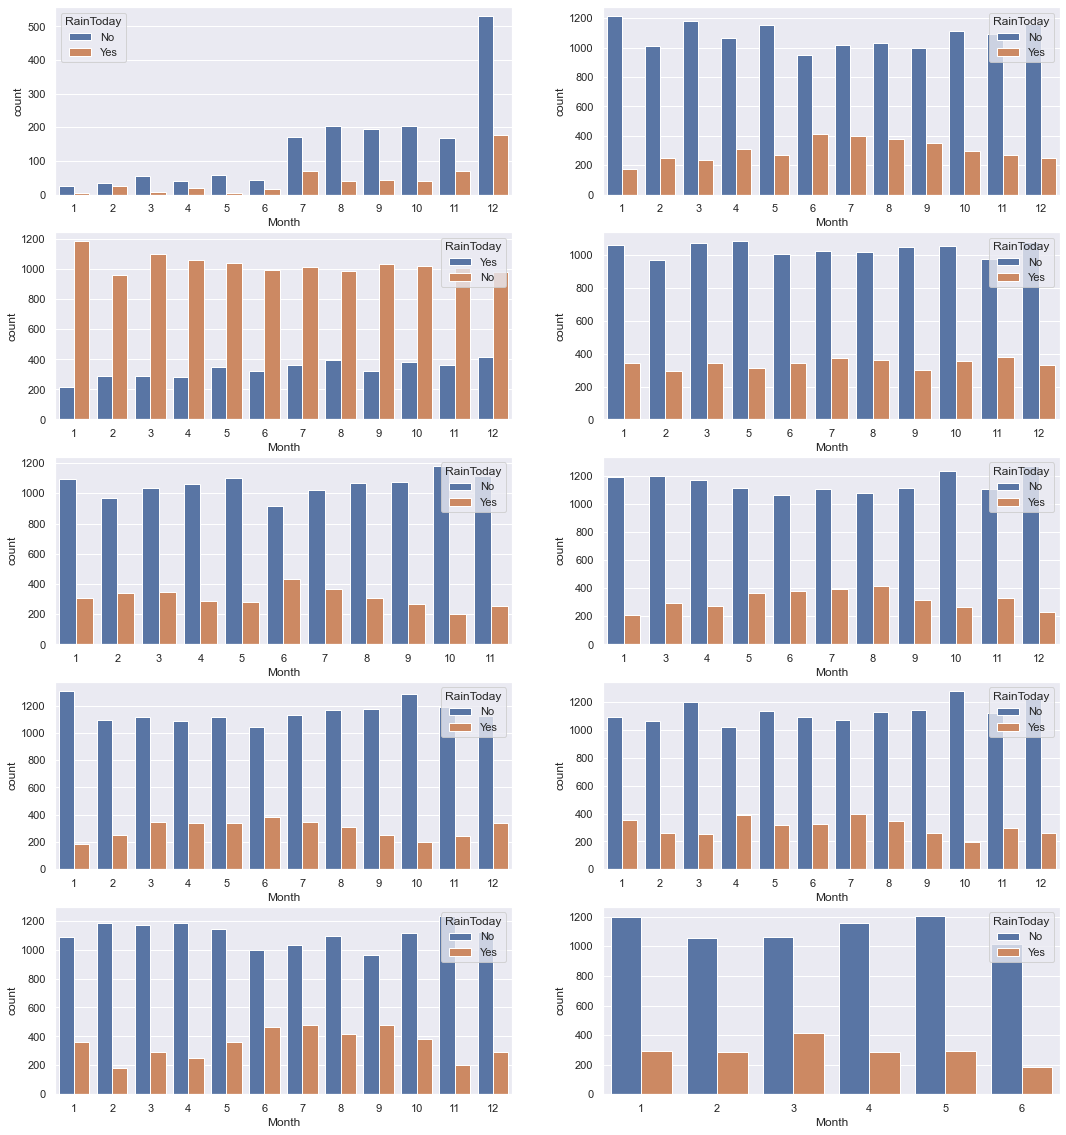

In [293]:
fig, ax = plt.subplots(5, 2, figsize=(18, 20))
#sns.countplot(data=d2007, x='Month', hue='RainToday', ax = ax[0,0],)
sns.countplot(data=d2008, x='Month', hue='RainToday', ax = ax[0,0],)
sns.countplot(data=d2009, x='Month', hue='RainToday', ax = ax[0,1],)
sns.countplot(data=d2010, x='Month', hue='RainToday', ax = ax[1,0],)
sns.countplot(data=d2011, x='Month', hue='RainToday', ax = ax[1,1],)
sns.countplot(data=d2012, x='Month', hue='RainToday', ax = ax[2,0],)
sns.countplot(data=d2013, x='Month', hue='RainToday', ax = ax[2,1],)
sns.countplot(data=d2014, x='Month', hue='RainToday', ax = ax[3,0],)
sns.countplot(data=d2015, x='Month', hue='RainToday', ax = ax[3,1],)
sns.countplot(data=d2016, x='Month', hue='RainToday', ax = ax[4,0],)
sns.countplot(data=d2017, x='Month', hue='RainToday', ax = ax[4,1],)
plt.show()

In [294]:
df['Month_sin']=df['Month']
df['Month_cos']=df['Month']
df['Month_sin']= np.sin((df['Month'] -1)* (2* np.pi / 12)) 
df['Month_cos']= np.cos((df['Month'] -1)* (2* np.pi / 12))
df = df.drop(["Date","Day","Year","Month"], axis=1)

In [295]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month_sin,Month_cos
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-0.5,0.866025
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-0.5,0.866025
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-0.5,0.866025
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-0.5,0.866025
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-0.5,0.866025


Vriables categoricas
Location          object
WindGustDir       object
WindDir9am        object
WindDir3pm        object
RainToday         object
RainTomorrow      object

In [296]:
print("Location:",df['Location'].unique().shape[0])
print("WindGustDir:",df['WindGustDir'].unique().shape[0])
print("WindDir9am:",df['WindDir9am'].unique().shape[0])
print("WindDir3pm:",df['WindDir3pm'].unique().shape[0])
print("RainToday:",df['RainToday'].unique().shape[0])
print("RainTomorrow:",df['RainTomorrow'].unique().shape[0])

Location: 49
WindGustDir: 17
WindDir9am: 17
WindDir3pm: 17
RainToday: 3
RainTomorrow: 3


# Location

In [297]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

https://www.kaggle.com/learn/geospatial-analysis
vamos a intentar mapear espacialmente las ciudades con coordenadas geograficas de latitud y longitud para aprovechar la informacion espacial de las mismas

In [298]:
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
#result = geolocator.geocode("The Great Pyramid of Giza")
#result
#def my_geocoder(row):
#    try:
#        point = geocode(row, provider='nominatim').geometry.iloc[0]
#        return pd.Series({'Latitude': point.y, 'Longitude': point.x, 'geometry': point})
#    except:
#        return None

#universities[['Latitude', 'Longitude', 'geometry']] = universities.apply(lambda x: my_geocoder(x['Name']), axis=1)

#print("{}% of addresses were geocoded!".format((1 - sum(np.isnan(universities["Latitude"])) / len(universities)) * 100))

# Drop universities that were not successfully geocoded
#universities = universities.loc[~np.isnan(universities["Latitude"])]
#universities = gpd.GeoDataFrame(universities, geometry=universities.geometry)
#universities.crs = {'init': 'epsg:4326'}
#universities.head()
#ciudades = my_geocoder(df['Location'])

Por algun problema no puedo hacer funcionar el geocoder
Se asignan a través de un archivo CSV


In [299]:
coor = pd.read_csv("Coordenadas.csv")
coor.head(5)

,Ciudad,Longitud,Latitud
0,Albury,-36.0806,146.9158
1,BadgerysCreek,-33.7400,151.0300
2,Cobar,-31.4900,145.8400
3,CoffsHarbour,-30.3022,153.1189
4,Moree,-29.4650,149.8344


In [300]:
df['Longitud'] = df['Location']
df['Latitud'] = df['Location']

In [301]:
df['Latitud'] = df['Latitud'].map(coor.set_index('Ciudad')['Latitud'])
df['Longitud'] = df['Longitud'].map(coor.set_index('Ciudad')['Longitud'])
df = df.drop(['Location'], axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month_sin,Month_cos,Longitud,Latitud
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,8.0,NaN,16.9,21.8,No,No,-0.5,0.866025,-36.0806,146.9158
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,NaN,NaN,17.2,24.3,No,No,-0.5,0.866025,-36.0806,146.9158
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,NaN,2.0,21.0,23.2,No,No,-0.5,0.866025,-36.0806,146.9158
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,NaN,NaN,18.1,26.5,No,No,-0.5,0.866025,-36.0806,146.9158
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,7.0,8.0,17.8,29.7,No,No,-0.5,0.866025,-36.0806,146.9158


# WinDir 

In [302]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [303]:
df.iloc[:,[7,9,10]]

,WindDir9am,WindSpeed9am,WindSpeed3pm
0,W,20.0,24.0
1,NNW,4.0,22.0
2,W,19.0,26.0
3,SE,11.0,9.0
4,ENE,7.0,20.0
...,...,...,...
145455,SE,13.0,11.0
145456,SE,13.0,9.0
145457,SE,9.0,9.0
145458,SSE,13.0,7.0


Codificamos como una variable numerica segun  los angulos de la rosa de los vientos
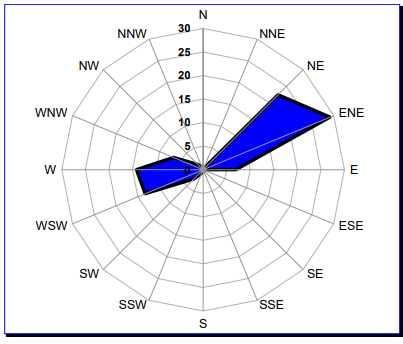

In [304]:
Wind = pd.read_csv("Vientos.csv")
Wind.head()

,Cardinal,Angulo
0,E,0.0
1,ENE,22.5
2,NE,45.0
3,NNE,67.5
4,N,90.0


In [305]:
df['WindGustDir'] = df['WindGustDir'].map(Wind.set_index('Cardinal')['Angulo'])
df['WindDir9am'] = df['WindDir9am'].map(Wind.set_index('Cardinal')['Angulo'])
df['WindDir3pm'] = df['WindDir3pm'].map(Wind.set_index('Cardinal')['Angulo'])


In [306]:
df.iloc[:,[7,9,10]]

,WindDir9am,WindSpeed9am,WindSpeed3pm
0,180.0,20.0,24.0
1,112.5,4.0,22.0
2,180.0,19.0,26.0
3,315.0,11.0,9.0
4,22.5,7.0,20.0
...,...,...,...
145455,315.0,13.0,11.0
145456,315.0,13.0,9.0
145457,315.0,9.0,9.0
145458,292.5,13.0,7.0


In [307]:
df['WindGustDir_sin']=df['WindGustDir']
df['WindGustDir_cos']=df['WindGustDir']
df['WindGustDir_sin']= np.sin((df['WindGustDir'] -1)* (2* np.pi / 360)) 
df['WindGustDir_cos']= np.cos((df['WindGustDir'] -1)* (2* np.pi / 360))
df['WindDir9am_sin']=df['WindDir9am']
df['WindDir9am_cos']=df['WindDir9am']
df['WindDir9am_sin']= np.sin((df['WindDir9am'] -1)* (2* np.pi / 360)) 
df['WindDir9am_cos']= np.cos((df['WindDir9am'] -1)* (2* np.pi / 360))
df['WindDir3pm_sin']=df['WindDir3pm']
df['WindDir3pm_cos']=df['WindDir3pm']
df['WindDir3pm_sin']= np.sin((df['WindDir3pm'] -1)* (2* np.pi / 360)) 
df['WindDir3pm_cos']= np.cos((df['WindDir3pm'] -1)* (2* np.pi / 360))
df = df.drop(["WindGustDir","WindDir9am","WindDir3pm"], axis=1)

In [308]:
print(df.dtypes)

MinTemp            float64
MaxTemp            float64
Rainfall           float64
Evaporation        float64
Sunshine           float64
WindGustSpeed      float64
WindSpeed9am       float64
WindSpeed3pm       float64
Humidity9am        float64
Humidity3pm        float64
Pressure9am        float64
Pressure3pm        float64
Cloud9am           float64
Cloud3pm           float64
Temp9am            float64
Temp3pm            float64
RainToday           object
RainTomorrow        object
Month_sin          float64
Month_cos          float64
Longitud           float64
Latitud            float64
WindGustDir_sin    float64
WindGustDir_cos    float64
WindDir9am_sin     float64
WindDir9am_cos     float64
WindDir3pm_sin     float64
WindDir3pm_cos     float64
dtype: object


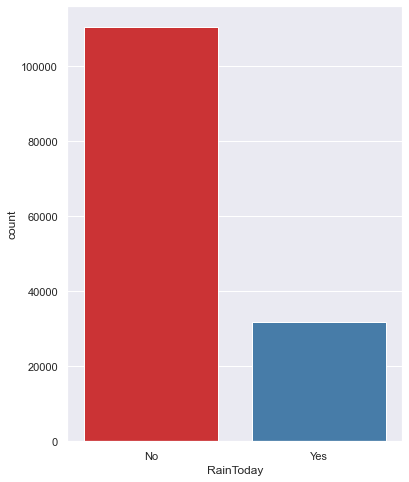

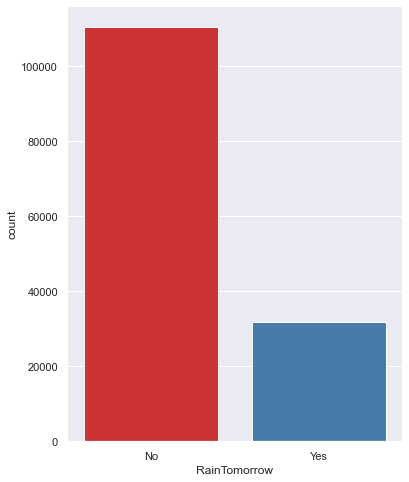

In [309]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainToday", data=df, palette="Set1")
plt.show()
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

La varible de salida no se encuentra balanceada esto puede cesgar la predicción. Vamos a usar f1-Score para evaluar

Las vamos a Codificar con 0 y 1 segun el metodo de Label Encoding por ser datos binarios


In [310]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Month_sin,Month_cos,Longitud,Latitud,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,-0.5,0.866025,-36.0806,146.9158,0.017452,-0.999848,0.017452,-0.999848,0.398749,-0.917060
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,-0.5,0.866025,-36.0806,146.9158,0.398749,-0.917060,0.930418,-0.366501,-0.366501,-0.930418
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,-0.5,0.866025,-36.0806,146.9158,-0.366501,-0.930418,0.017452,-0.999848,-0.366501,-0.930418
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,-0.5,0.866025,-36.0806,146.9158,0.694658,0.719340,-0.719340,0.694658,-0.017452,0.999848
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,-0.5,0.866025,-36.0806,146.9158,0.017452,-0.999848,0.366501,0.930418,0.719340,-0.694658


### 3. Limpieza y preparación de datos / ingeniería de features

In [311]:
valoresFaltante=df.isnull().sum() 
porcentajeFaltante = df.isnull().sum()/df.shape[0]*100 
value = {
    'valoresFaltante ':valoresFaltante,
    'porcentajeFaltante %':porcentajeFaltante , 
     'data type' : df.dtypes
}
nullInfo=pd.DataFrame(value)
nullInfo.sort_values('porcentajeFaltante %', ascending=False)

,valoresFaltante,porcentajeFaltante %,data type
Sunshine,69835,48.009762,float64
Evaporation,62790,43.166506,float64
Cloud3pm,59358,40.807095,float64
Cloud9am,55888,38.421559,float64
Pressure9am,15065,10.356799,float64
Pressure3pm,15028,10.331363,float64
WindDir9am_sin,10566,7.263853,float64
WindDir9am_cos,10566,7.263853,float64
WindGustDir_sin,10326,7.098859,float64
WindGustDir_cos,10326,7.098859,float64


eliminamos las columnas con mas del 38% faltante

In [312]:
df = df.drop(["Sunshine","Evaporation","Cloud3pm","Cloud9am"], axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Month_sin,Month_cos,Longitud,Latitud,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,-0.5,0.866025,-36.0806,146.9158,0.017452,-0.999848,0.017452,-0.999848,0.398749,-0.917060
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,-0.5,0.866025,-36.0806,146.9158,0.398749,-0.917060,0.930418,-0.366501,-0.366501,-0.930418
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,-0.5,0.866025,-36.0806,146.9158,-0.366501,-0.930418,0.017452,-0.999848,-0.366501,-0.930418
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,-0.5,0.866025,-36.0806,146.9158,0.694658,0.719340,-0.719340,0.694658,-0.017452,0.999848
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,-0.5,0.866025,-36.0806,146.9158,0.017452,-0.999848,0.366501,0.930418,0.719340,-0.694658


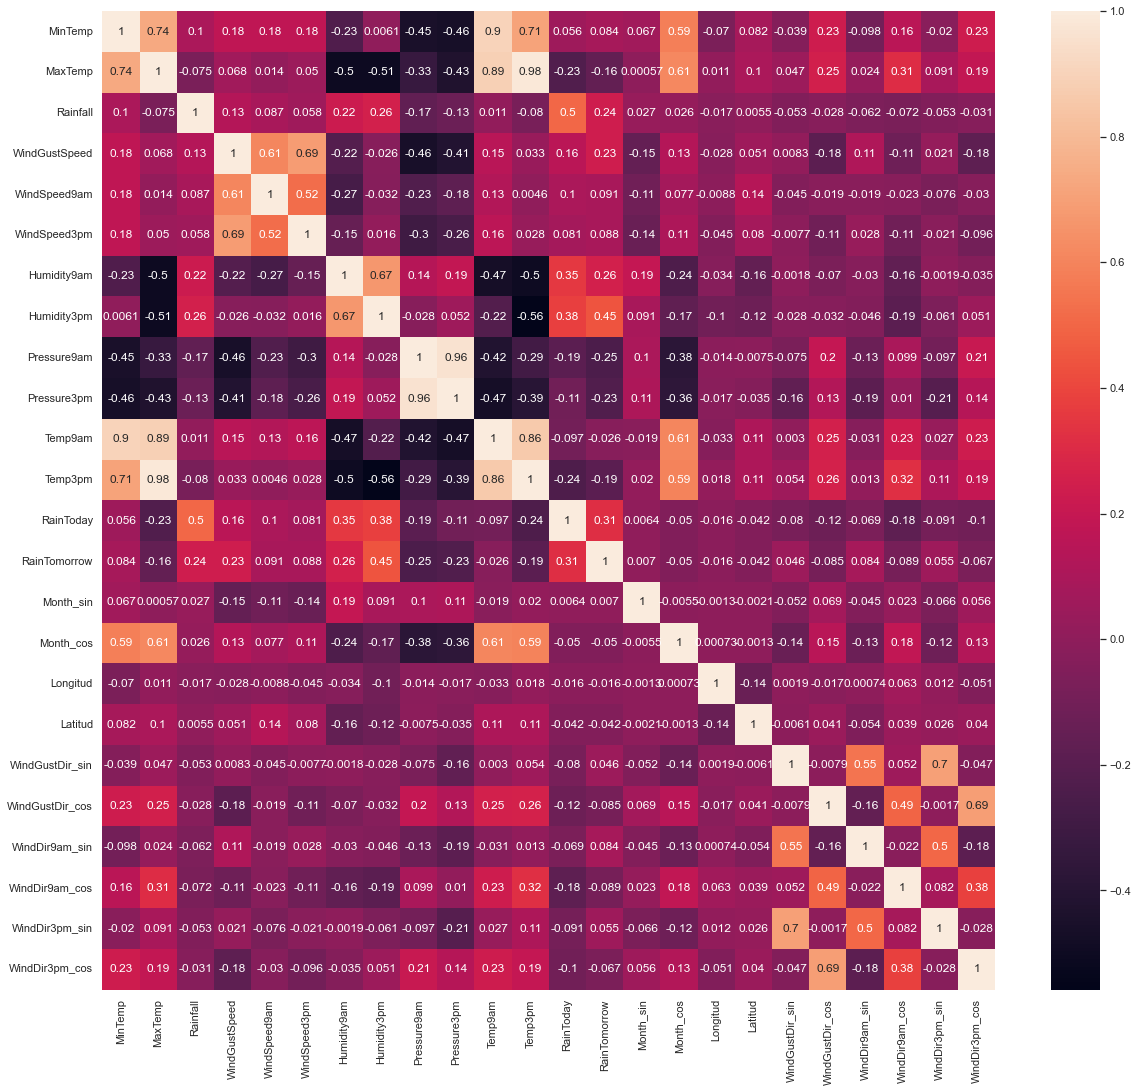

In [313]:

plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True);
plt.show()

Hay Fuertes correlaciones entre las temperaturas, entre WindGustSpeed y WindSpeed3pm y entre Pressure9am y Pressure3pm

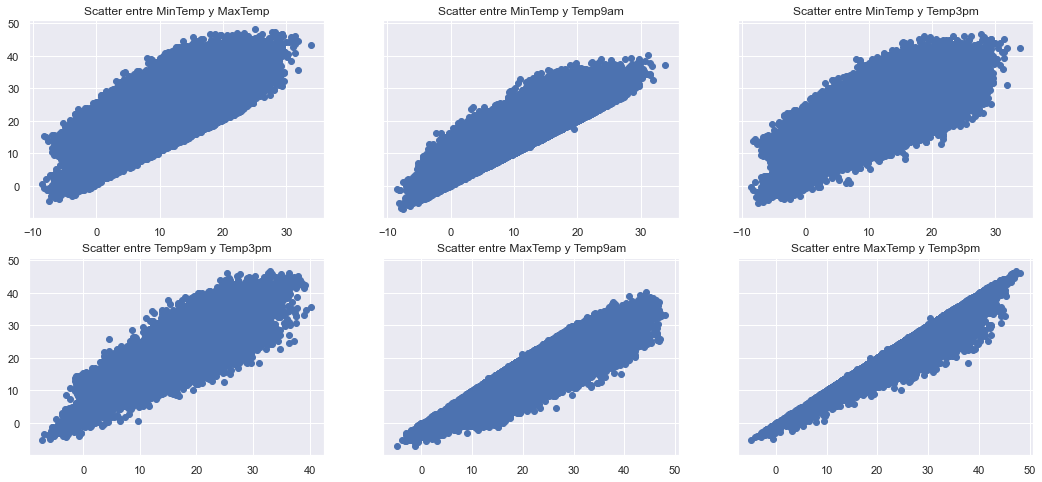

In [314]:

fig, ax = plt.subplots(2,3, sharey=True, figsize=(18,8))
plt.title('Scatter plot entre Temperaturas')

ax[0,0].scatter(df['MinTemp'], df['MaxTemp'])
ax[0,0].set_title('Scatter entre MinTemp y MaxTemp')


ax[0,1].scatter(df['MinTemp'], df['Temp9am'])
ax[0,1].set_title('Scatter entre MinTemp y Temp9am')


ax[0,2].scatter(df['MinTemp'], df['Temp3pm'])
ax[0,2].set_title('Scatter entre MinTemp y Temp3pm')

ax[1,0].scatter(df['Temp9am'], df['Temp3pm'])
ax[1,0].set_title('Scatter entre Temp9am y Temp3pm')


ax[1,1].scatter(df['MaxTemp'], df['Temp9am'])
ax[1,1].set_title('Scatter entre MaxTemp y Temp9am')


ax[1,2].scatter(df['MaxTemp'], df['Temp3pm'])
ax[1,2].set_title('Scatter entre MaxTemp y Temp3pm')


plt.show()

Text(0.5, 1.0, 'Scatter entre WindGustSpeed y WindSpeed3pm')

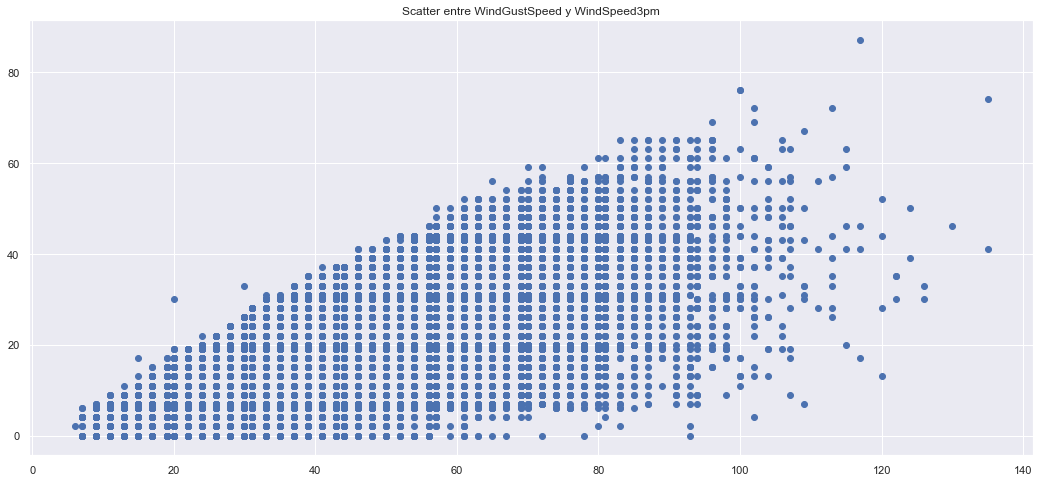

In [315]:
fig, ax = plt.subplots(1,1, sharey=True, figsize=(18,8))


ax.scatter(df['WindGustSpeed'], df['WindSpeed3pm'])
ax.set_title('Scatter entre WindGustSpeed y WindSpeed3pm')



Text(0.5, 1.0, 'Scatter entre Pressure9am y Pressure3pm')

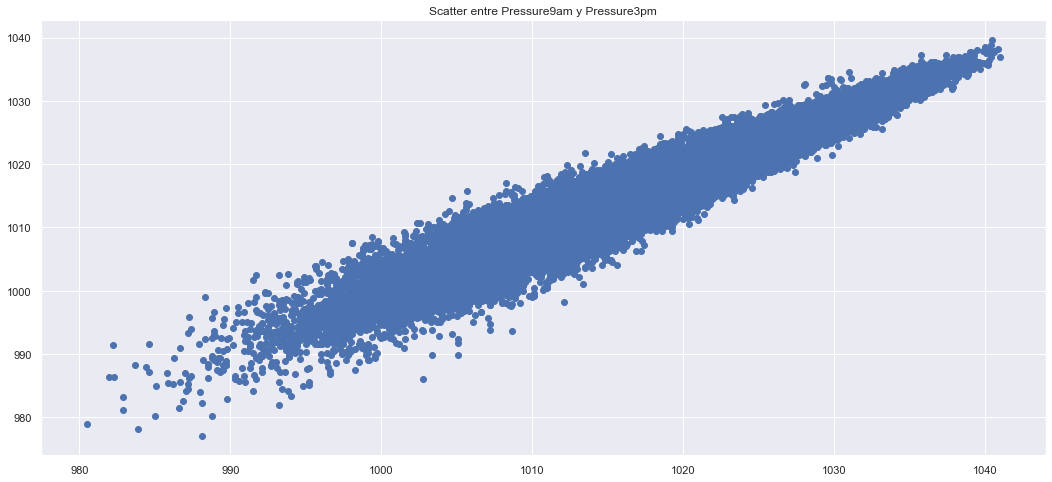

In [316]:
fig, ax = plt.subplots(1,1, sharey=True, figsize=(18,8))
ax.scatter(df['Pressure9am'], df['Pressure3pm'])
ax.set_title('Scatter entre Pressure9am y Pressure3pm')



In [317]:
df.drop(["Temp9am", "Temp3pm", "Pressure3pm","MaxTemp"], axis=1, inplace=True)

C:\Users\Pablo\.conda\envs\VPC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


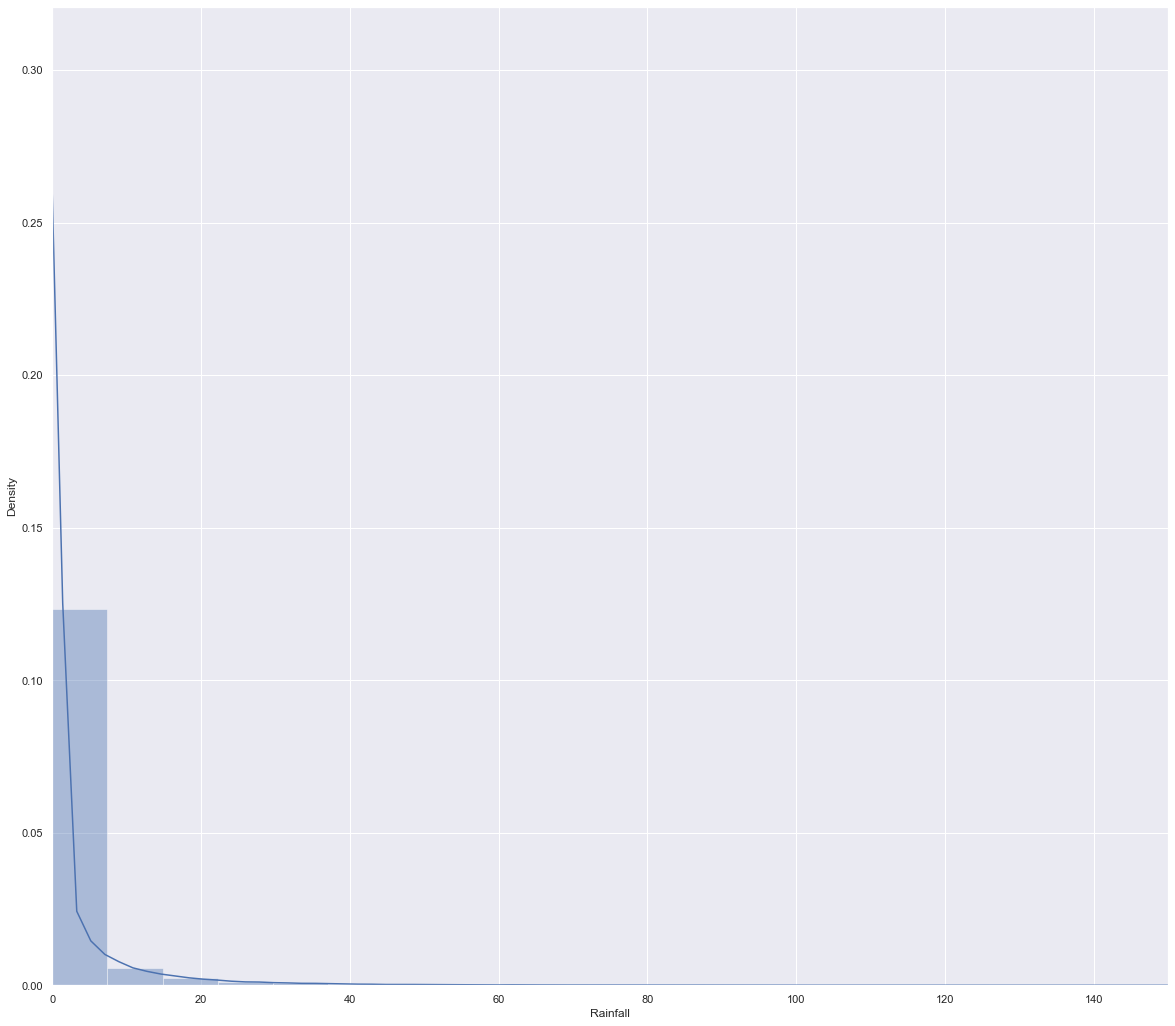

In [318]:
plt.figure(figsize=(20,18))
sns.distplot(df['Rainfall'])
plt.xlim(0,150)
plt.show()

### 2. Esquema de validación de resultados

In [319]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10


df_RT= df.copy()
df_RT.dropna(subset=['RainTomorrow'], inplace=True)
df_RT.dropna(subset=['RainToday'], inplace=True)
df_RT.head()
X_RT = df_RT.drop(['RainTomorrow'], axis = 1)
y_RT = df_RT['RainTomorrow']
X_RT_train, X_RT_test, y_RT_train, y_RT_test = train_test_split(X_RT, y_RT, test_size=(validation_ratio+test_ratio), stratify=y_RT)
#X_RT_val, X_RT_test, y_RT_val, y_RT_test = train_test_split(X_RT_test, y_RT_test, train_size=(validation_ratio/(validation_ratio+test_ratio))) 


df_RF= df.copy()
df_RF.dropna(subset=['Rainfall'], inplace=True)
X_RF = df_RF.drop(['Rainfall'], axis = 1)
y_RF = df_RF['Rainfall']
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y_RF, test_size=(validation_ratio+test_ratio))
#X_RF_val, X_RF_test, y_RF_val, y_RF_test = train_test_split(X_RF_test, y_RF_test, train_size=(validation_ratio/(validation_ratio+test_ratio))) 


In [181]:
valoresFaltante=df.isnull().sum() 
porcentajeFaltante = df.isnull().sum()/df.shape[0]*100 
value = {
    'valoresFaltante ':valoresFaltante,
    'porcentajeFaltante %':porcentajeFaltante , 
     'data type' : df.dtypes
}
nullInfo=pd.DataFrame(value)
nullInfo.sort_values('porcentajeFaltante %', ascending=False)

,valoresFaltante,porcentajeFaltante %,data type
Pressure9am,15065,10.356799,float64
WindDir9am_cos,10566,7.263853,float64
WindDir9am_sin,10566,7.263853,float64
WindGustDir_cos,10326,7.098859,float64
WindGustDir_sin,10326,7.098859,float64
WindGustSpeed,10263,7.055548,float64
Humidity3pm,4507,3.098446,float64
WindDir3pm_cos,4228,2.906641,float64
WindDir3pm_sin,4228,2.906641,float64
RainTomorrow,3267,2.245978,float64


In [182]:
# Detectar outliers con IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp             9.300000
Rainfall            0.800000
WindGustSpeed      17.000000
WindSpeed9am       12.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        29.000000
Pressure9am         9.500000
RainToday           0.000000
RainTomorrow        0.000000
Month_sin           1.366025
Month_cos           1.366025
Longitud           11.890000
Latitud            33.141100
WindGustDir_sin     1.413998
WindGustDir_cos     1.413998
WindDir9am_sin      1.438680
WindDir9am_cos      1.389317
WindDir3pm_sin      1.413998
WindDir3pm_cos      1.413998
dtype: float64


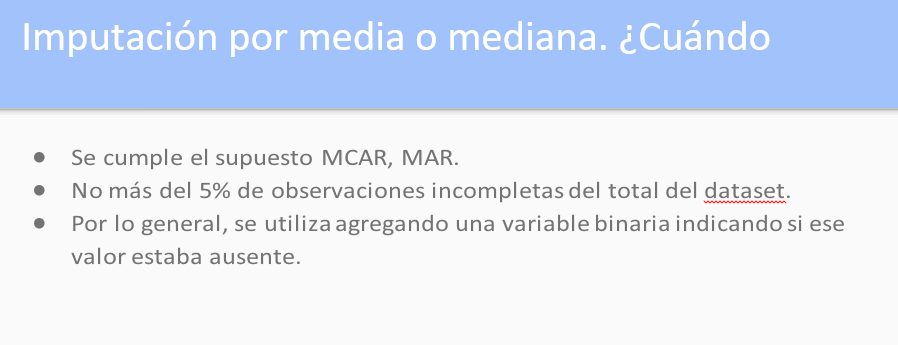

In [ ]:
    scaler = MinMaxScaler()
    X_RT_train = pd.DataFrame(X_RT_train)
    X_RT_test = pd.DataFrame(X_RT_test)
    X_RT_train = pd.DataFrame(scaler.fit_transform(X_RT_train), columns = X_RT_train.columns)

In [185]:
imputacion=1;
if imputacion==1:
    # Tratamiento de Variables con faltantes menores al 5%
    #
    X_RT_train['MinTemp'].fillna((df['MinTemp'].median()), inplace=True)
    X_RT_train['Humidity3pm'].fillna((df['Humidity3pm'].median()), inplace=True)
    X_RT_train['WindDir3pm_sin'].fillna((df['WindDir3pm_sin'].median()), inplace=True)
    X_RT_train['WindDir3pm_cos'].fillna((df['WindDir3pm_cos'].median()), inplace=True)
    X_RT_train['Rainfall'].fillna((df['Rainfall'].median()), inplace=True)
    X_RT_train['RainToday'].fillna((df['RainToday'].median()), inplace=True)
    X_RT_train['WindSpeed3pm'].fillna((df['WindSpeed3pm'].median()), inplace=True)
    X_RT_train['Humidity9am'].fillna((df['Humidity9am'].median()), inplace=True)
    X_RT_train['WindSpeed9am'].fillna((df['WindSpeed9am'].median()), inplace=True)
    X_RT_train['MinTemp'].fillna((df['MinTemp'].median()), inplace=True)
    #
    ## Tratamiento de Variables con faltantes mayores al 5%
    #
    #X_RT_train['Pressure9am'].fillna((df['Pressure9am'].median()), inplace=True)
    #X_RT_train['WindDir9am'].fillna((df['WindDir9am'].median()), inplace=True)
    #X_RT_train['WindGustDir'].fillna((df['WindGustDir'].median()), inplace=True)
    #X_RT_train['WindGustSpeed'].fillna((df['WindGustSpeed'].median()), inplace=True)

    results=[]

    param_grid = {
        "imputer__n_nearest_features": [None,1,2,3]
    }

    for param in param_grid["imputer__n_nearest_features"]:
        pipeline = Pipeline(steps=[
            ( 'imputer' ,IterativeImputer(n_nearest_features=param)), 
            ( 'lr' , LogisticRegression(max_iter=1000) )
        ])

        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
        scores = cross_val_score(pipeline, X_RT_train, y_RT_train, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
        results.append(scores)
    print(scores)
    mice_imputer = IterativeImputer(n_nearest_features=None)
    X_RT_train = mice_imputer.fit_transform(X_RT_train)



    
    #Aplicamos la misma imputacion al dataset de test
    #Lo realizamos en instancias separadas para no transladar datos de un dataset a otro
    X_RT_test['MinTemp'].fillna((df['MinTemp'].median()), inplace=True)
    X_RT_test['Humidity3pm'].fillna((df['Humidity3pm'].mean()), inplace=True)
    X_RT_test['WindDir3pm_sin'].fillna((df['WindDir3pm_sin'].median()), inplace=True)
    X_RT_test['WindDir3pm_cos'].fillna((df['WindDir3pm_cos'].median()), inplace=True)
    X_RT_test['Rainfall'].fillna((df['Rainfall'].mean()), inplace=True)
    X_RT_test['RainToday'].fillna((df['RainToday'].median()), inplace=True)
    X_RT_test['WindSpeed3pm'].fillna((df['WindSpeed3pm'].mean()), inplace=True)
    X_RT_test['Humidity9am'].fillna((df['Humidity9am'].mean()), inplace=True)
    X_RT_test['WindSpeed9am'].fillna((df['WindSpeed9am'].mean()), inplace=True)
    X_RT_test['MinTemp'].fillna((df['MinTemp'].mean()), inplace=True)

    #
    #
    #X_RT_test['Pressure9am'].fillna((df['Pressure9am'].median()), inplace=True)
    #X_RT_test['WindDir9am'].fillna((df['WindDir9am'].median()), inplace=True)
    #X_RT_test['WindGustDir'].fillna((df['WindGustDir'].median()), inplace=True)
    #X_RT_test['WindGustSpeed'].fillna((df['WindGustSpeed'].median()), inplace=True)

    results=[]

    param_grid = {
        "imputer__n_nearest_features": [None,1,2,3]
    }

    for param in param_grid["imputer__n_nearest_features"]:
        pipeline = Pipeline(steps=[
            ( 'imputer' ,IterativeImputer(n_nearest_features=param)), 
            ( 'lr' , LogisticRegression(max_iter=1000) )
        ])

        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
        scores = cross_val_score(pipeline, X_RT_test, y_RT_test, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
        results.append(scores)
    #print(scores)
    
    mice_imputer = IterativeImputer(n_nearest_features=None)
    X_RT_test = mice_imputer.fit_transform(X_RT_test)


[0.84030743 0.83920229 0.84271864 0.83729341 0.84166374 0.84141257
 0.83915206 0.83669061 0.84045813 0.83864972 0.83628874 0.83975486
 0.84266841 0.84060883 0.83739388 0.84156327 0.83880042 0.83930276
 0.83910182 0.83754458 0.84075953 0.83794645 0.83784598 0.83694178
 0.84337168]


C:\Users\Pablo\.conda\envs\VPC\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


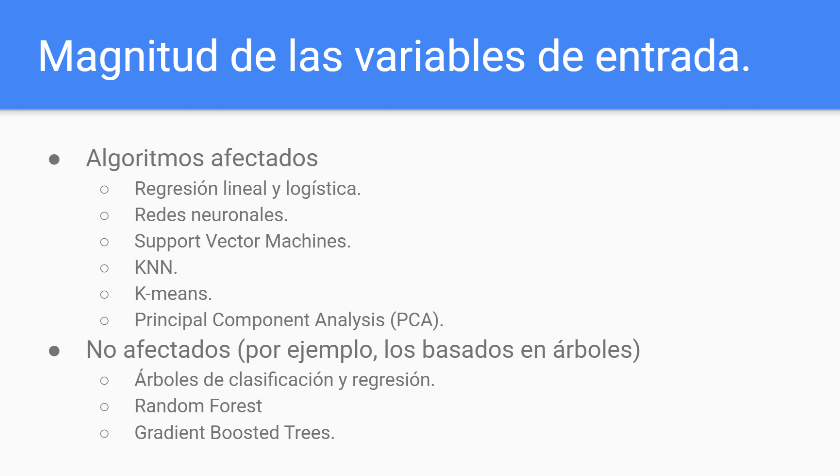

In [188]:
if imputacion==1:  
    ranfor = RandomForestClassifier()
    ranfor.fit(X_RT_train,y_RT_train)
    print(f"Random Forest con imputación {imputacion} Accuracy: {100*ranfor.score(X_RT_test, y_RT_test)} %")
    print(f"f1_Score: {100*f1_score(y_RT_test, ranfor.predict(X_RT_test), average='weighted')} %")

Random Forest con imputación 1 Accuracy: 85.32748839608045 %
f1_Score: 84.14568036600613 %


In [189]:
if imputacion==1:   
    scaler = MinMaxScaler()
    X_RT_train = pd.DataFrame(X_RT_train)
    X_RT_test = pd.DataFrame(X_RT_test)
    X_RT_train = pd.DataFrame(scaler.fit_transform(X_RT_train), columns = X_RT_train.columns)

In [190]:
if imputacion==1:  
    logreg = LogisticRegression()
    logreg.fit(X_RT_train,y_RT_train)
    print(f"Logistic Regresion con imputación {imputacion} F1: {100*f1_score(y_RT_test, logreg.predict(X_RT_test), average='weighted')} %")
    print(f"f1_Score: {100*f1_score(y_RT_test, logreg.predict(X_RT_test), average='weighted')} %")

Logistic Regresion con imputación 1 Accuracy: 77.58216512729147 %
f1_Score: 67.78825273950105 %


C:\Users\Pablo\.conda\envs\VPC\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10


df_RT= df.copy()
df_RT.dropna(subset=['RainTomorrow'], inplace=True)
df_RT.head()
X_RT = df_RT.drop(['RainTomorrow'], axis = 1)
y_RT = df_RT['RainTomorrow']
X_RT_train, X_RT_test, y_RT_train, y_RT_test = train_test_split(X_RT, y_RT, test_size=(validation_ratio+test_ratio))
#X_RT_val, X_RT_test, y_RT_val, y_RT_test = train_test_split(X_RT_test, y_RT_test, train_size=(validation_ratio/(validation_ratio+test_ratio))) 


df_RF= df.copy()
df_RF.dropna(subset=['Rainfall'], inplace=True)
X_RF = df_RF.drop(['Rainfall'], axis = 1)
y_RF = df_RF['Rainfall']
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y_RF, test_size=(validation_ratio+test_ratio))
#X_RF_val, X_RF_test, y_RF_val, y_RF_test = train_test_split(X_RF_test, y_RF_test, train_size=(validation_ratio/(validation_ratio+test_ratio))) 


In [ ]:
imputacion=2
if imputacion==2:
    scaler = MinMaxScaler()
    X_RF_train = pd.DataFrame(scaler.fit_transform(X_RF_train), columns = X_RF_train.columns)
    imputer = KNNImputer(n_neighbors=3)
    X_RF_train = pd.DataFrame(imputer.fit_transform(X_RF_train),columns = X_RF_train.columns)
    scaler = MinMaxScaler()
    X_RF_test = pd.DataFrame(scaler.fit_transform(X_RF_test), columns = X_RF_test.columns)
    imputer = KNNImputer(n_neighbors=3)
    X_RF_test = pd.DataFrame(imputer.fit_transform(X_RF_test),columns = X_RF_test.columns)

In [ ]:
if imputacion==2:
    scaler = MinMaxScaler()
    X_RT_train = pd.DataFrame(scaler.fit_transform(X_RT_train), columns = X_RT_train.columns)
    imputer = KNNImputer(n_neighbors=3)
    X_RT_train = pd.DataFrame(imputer.fit_transform(X_RT_train),columns = X_RT_train.columns)
    scaler = MinMaxScaler()
    X_RT_test = pd.DataFrame(scaler.fit_transform(X_RT_test), columns = X_RT_test.columns)
    imputer = KNNImputer(n_neighbors=3)
    X_RT_test = pd.DataFrame(imputer.fit_transform(X_RT_test),columns = X_RT_test.columns)

In [ ]:
#X_RT_train.isnull().sum()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_RT_train,y_RT_train)
print(f"Accuracy: {100*logreg.score(X_RT_test, y_RT_test)} %")
print(f"f1_Score: {100*f1_score(y_RT_test, logreg.predict(X_RT_test), average='weighted')} %")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_RT_train,y_RT_train)
print(f"Accuracy: {100*ranfor.score(X_RT_test, y_RT_test)} %")
print(f"f1_Score: {100*f1_score(y_RT_test, logreg.predict(X_RT_test), average='weighted')} %")

In [ ]:
#X_RF_test.isnull().sum()

In [56]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10


df_RT= df.copy()
df_RT.dropna(subset=['RainTomorrow'], inplace=True)
df_RT.head()
X_RT = df_RT.drop(['RainTomorrow'], axis = 1)
y_RT = df_RT['RainTomorrow']
X_RT_train, X_RT_test, y_RT_train, y_RT_test = train_test_split(X_RT, y_RT, test_size=(validation_ratio+test_ratio))
#X_RT_val, X_RT_test, y_RT_val, y_RT_test = train_test_split(X_RT_test, y_RT_test, train_size=(validation_ratio/(validation_ratio+test_ratio))) 



In [60]:

results=[]

param_grid = {
    "imputer__n_nearest_features": [None,1,2,3]
}

for param in param_grid["imputer__n_nearest_features"]:
    pipeline = Pipeline(steps=[
        ( 'imputer' ,IterativeImputer(n_nearest_features=param)), 
        ( 'lr' , LogisticRegression(max_iter=1000) )
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    scores = cross_val_score(pipeline, X_RT_train, y_RT_train, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)
print(scores)

[0.8401065  0.83839855 0.8410107  0.8419149  0.84096047 0.83864972
 0.83869995 0.84171397 0.84086    0.8414628  0.84005626 0.84060883
 0.84181444 0.83623851 0.84352238 0.8404079  0.84507962 0.83674084
 0.83744412 0.84307028 0.8417642  0.83859949 0.84045813 0.8410107
 0.8402572 ]


In [61]:
mice_imputer = IterativeImputer(n_nearest_features=None)
X_RT_test = mice_imputer.fit_transform(X_RT_test)

In [62]:

results=[]

param_grid = {
    "imputer__n_nearest_features": [None,1,2,3]
}

for param in param_grid["imputer__n_nearest_features"]:
    pipeline = Pipeline(steps=[
        ( 'imputer' ,IterativeImputer(n_nearest_features=param)), 
        ( 'lr' , LogisticRegression(max_iter=1000) )
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    scores = cross_val_score(pipeline, X_RT_test, y_RT_test, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)
print(scores)

[0.83485701 0.84306142 0.83837318 0.83600985 0.83776814 0.83520863
 0.83520863 0.83579466 0.83729926 0.844098   0.84528833 0.83919362
 0.83403657 0.83636151 0.83436877 0.83415377 0.83720113 0.84095171
 0.83729926 0.8387059  0.84200656 0.83169245 0.83860759 0.83952643
 0.83894034]


In [63]:

mice_imputer = IterativeImputer(n_nearest_features=None)
X_RT_train = mice_imputer.fit_transform(X_RT_train)


In [64]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_RT_train,y_RT_train)
print(f"Accuracy: {100*ranfor.score(X_RT_test, y_RT_test)} %")

Accuracy: 85.33686530076422 %


In [66]:

    scaler = MinMaxScaler()
    X_RT_train = pd.DataFrame(X_RT_train)
    X_RT_test = pd.DataFrame(X_RT_test)
    X_RT_train = pd.DataFrame(scaler.fit_transform(X_RT_train), columns = X_RT_train.columns)

In [67]:
  
    logreg = LogisticRegression()
    logreg.fit(X_RT_train,y_RT_train)
    print(f"Logistic Regresion con imputación {imputacion} Accuracy: {100*logreg.score(X_RT_test, y_RT_test)} %")

Logistic Regresion con imputación 2 Accuracy: 77.45323268788972 %


C:\Users\Pablo\.conda\envs\VPC\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_RT_train)
X_test_pca = pca.transform(X_RT_test)


In [82]:
np.shape(X_test_pca)

(42658, 8)

In [84]:
    logreg = LogisticRegression()
    logreg.fit(X_RT_train,y_RT_train)
    print(f"Logistic Regresion con PCA Accuracy: {100*logreg.score(X_RT_test, y_RT_test)} %")

Logistic Regresion con PCA Accuracy: 77.45323268788972 %


C:\Users\Pablo\.conda\envs\VPC\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:

df_RF= df.copy()
df_RF.dropna(subset=['Rainfall'], inplace=True)
X_RF = df_RF.drop(['Rainfall'], axis = 1)
y_RF = df_RF['Rainfall']
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y_RF, test_size=(validation_ratio+test_ratio))
#X_RF_val, X_RF_test, y_RF_val, y_RF_test = train_test_split(X_RF_test, y_RF_test, train_size=(validation_ratio/(validation_ratio+test_ratio))) 


In [74]:
imputacion=1;
if imputacion==1:
    # Tratamiento de Variables con faltantes menores al 5%
    #
    X_RF_train['MinTemp'].fillna((df['MinTemp'].median()), inplace=True)
    X_RF_train['Humidity3pm'].fillna((df['Humidity3pm'].median()), inplace=True)
    X_RF_train['WindDir3pm'].fillna((df['WindDir3pm'].median()), inplace=True)
    X_RF_train['RainTomorrow'].fillna((df['RainTomorrow'].median()), inplace=True)
    X_RF_train['RainToday'].fillna((df['RainToday'].median()), inplace=True)
    X_RF_train['WindSpeed3pm'].fillna((df['WindSpeed3pm'].median()), inplace=True)
    X_RF_train['Humidity9am'].fillna((df['Humidity9am'].median()), inplace=True)
    X_RF_train['WindSpeed9am'].fillna((df['WindSpeed9am'].median()), inplace=True)
    X_RF_train['MinTemp'].fillna((df['MinTemp'].median()), inplace=True)
    #
    ## Tratamiento de Variables con faltantes mayores al 5%
    #
    X_RF_train['Pressure9am'].fillna((df['Pressure9am'].median()), inplace=True)
    X_RF_train['WindDir9am'].fillna((df['WindDir9am'].median()), inplace=True)
    X_RF_train['WindGustDir'].fillna((df['WindGustDir'].median()), inplace=True)
    X_RF_train['WindGustSpeed'].fillna((df['WindGustSpeed'].median()), inplace=True)

#    results=[]
#
#    param_grid = {
#        "imputer__n_nearest_features": [None,1,2,3]
#    }
#
#    for param in param_grid["imputer__n_nearest_features"]:
#        pipeline = Pipeline(steps=[
#            ( 'imputer' ,IterativeImputer(n_nearest_features=param)), 
#            ( 'lr' , LogisticRegression(max_iter=1000) )
#        ])
#
#        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
#        scores = cross_val_score(pipeline, X_RF_train, y_RF_train, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
#        results.append(scores)
#    print(scores)
#    mice_imputer = IterativeImputer(n_nearest_features=None)
#    X_RF_train = mice_imputer.fit_transform(X_RF_train)



    
    #Aplicamos la misma imputacion al dataset de test
    #Lo realizamos en instancias separadas para no transladar datos de un dataset a otro
    X_RF_test['MinTemp'].fillna((df['MinTemp'].median()), inplace=True)
    X_RF_test['Humidity3pm'].fillna((df['Humidity3pm'].mean()), inplace=True)
    X_RF_test['WindDir3pm'].fillna((df['WindDir3pm'].median()), inplace=True)
    X_RF_test['RainTomorrow'].fillna((df['RainTomorrow'].mean()), inplace=True)
    X_RF_test['RainToday'].fillna((df['RainToday'].median()), inplace=True)
    X_RF_test['WindSpeed3pm'].fillna((df['WindSpeed3pm'].mean()), inplace=True)
    X_RF_test['Humidity9am'].fillna((df['Humidity9am'].mean()), inplace=True)
    X_RF_test['WindSpeed9am'].fillna((df['WindSpeed9am'].mean()), inplace=True)
    X_RF_test['MinTemp'].fillna((df['MinTemp'].mean()), inplace=True)

    #
    #
    X_RF_test['Pressure9am'].fillna((df['Pressure9am'].median()), inplace=True)
    X_RF_test['WindDir9am'].fillna((df['WindDir9am'].median()), inplace=True)
    X_RF_test['WindGustDir'].fillna((df['WindGustDir'].median()), inplace=True)
    X_RF_test['WindGustSpeed'].fillna((df['WindGustSpeed'].median()), inplace=True)

    #results=[]

    #param_grid = {
    #    "imputer__n_nearest_features": [None,1,2,3]
    #}

    #for param in param_grid["imputer__n_nearest_features"]:
    #    pipeline = Pipeline(steps=[
    #        ( 'imputer' ,IterativeImputer(n_nearest_features=param)), 
    #        ( 'lr' , LogisticRegression(max_iter=1000) )
    #    ])

    #    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    #    scores = cross_val_score(pipeline, X_RF_test, y_RF_test, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
    #    results.append(scores)
    ##print(scores)
    
    #mice_imputer = IterativeImputer(n_nearest_features=None)
    #X_RF_test = mice_imputer.fit_transform(X_RF_test)


C:\Users\Pablo\.conda\envs\VPC\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [75]:
from sklearn.linear_model import LinearRegression 
reglineal = LinearRegression()
reglineal.fit(X_RF_train,y_RF_train)
print(f"Accuracy: {100*reglineal.score(X_RF_test, y_RF_test)} %")

Accuracy: 27.387792400186083 %


# Prediccion de Rainfall Tomorrow

In [332]:
df1 = df.copy()
dfor = pd.read_csv("weatherAUS.csv")
df1['Date'] = df1['RainToday']
df1['Date'] = dfor['Date']
df1['RainfallT']=df1['RainToday']
#df1.set_index('Date')
df1.head()

,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,...,Longitud,Latitud,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,Date,RainfallT
0,13.4,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,0.0,0.0,...,-36.0806,146.9158,0.017452,-0.999848,0.017452,-0.999848,0.398749,-0.917060,2008-12-01,0.0
1,7.4,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,0.0,0.0,...,-36.0806,146.9158,0.398749,-0.917060,0.930418,-0.366501,-0.366501,-0.930418,2008-12-02,0.0
2,12.9,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,0.0,0.0,...,-36.0806,146.9158,-0.366501,-0.930418,0.017452,-0.999848,-0.366501,-0.930418,2008-12-03,0.0
3,9.2,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,0.0,0.0,...,-36.0806,146.9158,0.694658,0.719340,-0.719340,0.694658,-0.017452,0.999848,2008-12-04,0.0
4,17.5,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,0.0,0.0,...,-36.0806,146.9158,0.017452,-0.999848,0.366501,0.930418,0.719340,-0.694658,2008-12-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,0.0,0.0,...,-25.3450,131.0300,-0.017452,0.999848,-0.719340,0.694658,0.366501,0.930418,2017-06-21,0.0
145456,3.6,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,0.0,0.0,...,-25.3450,131.0300,0.930418,-0.366501,-0.719340,0.694658,0.999848,0.017452,2017-06-22,0.0
145457,5.4,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,0.0,0.0,...,-25.3450,131.0300,0.999848,0.017452,-0.719340,0.694658,0.398749,-0.917060,2017-06-23,0.0
145458,7.8,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,0.0,0.0,...,-25.3450,131.0300,-0.719340,0.694658,-0.930418,0.366501,0.999848,0.017452,2017-06-24,0.0


In [337]:
df1.shape

(145460, 22)

In [338]:
df1.head()

,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,...,Longitud,Latitud,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,Date,RainfallT
0,13.4,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,0.0,0.0,...,-36.0806,146.9158,0.017452,-0.999848,0.017452,-0.999848,0.398749,-0.917060,2008-12-01,0.0
1,7.4,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,0.0,0.0,...,-36.0806,146.9158,0.398749,-0.917060,0.930418,-0.366501,-0.366501,-0.930418,2008-12-02,0.0
2,12.9,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,0.0,0.0,...,-36.0806,146.9158,-0.366501,-0.930418,0.017452,-0.999848,-0.366501,-0.930418,2008-12-03,0.0
3,9.2,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,0.0,0.0,...,-36.0806,146.9158,0.694658,0.719340,-0.719340,0.694658,-0.017452,0.999848,2008-12-04,0.0
4,17.5,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,0.0,0.0,...,-36.0806,146.9158,0.017452,-0.999848,0.366501,0.930418,0.719340,-0.694658,2008-12-05,0.0


In [342]:
df1.iloc[0,12]

-36.0806

In [344]:
i=0
for index1 in range(df1.shape[0]-1):
    for index in range((index1-3),(index1+5)):
        ts=pd.Timestamp(df1.iloc[index1,20]) + pd.DateOffset(days=1)
        if (pd.Timestamp(df1.iloc[index,20]) == ts and df1.iloc[index,12] == df1.iloc[index1,12] and df1.iloc[index,13] == df1.iloc[index1,13]):
            df1.iloc[index1,21] = df1.iloc[index,1]
            #print(df1.iloc[index,12],df1.iloc[index,13],df1.iloc[index1,21],df1.iloc[index1,20])
            #i=i+1
            #if i==1001 :
            #    print(index1)
            #    i=0;
            break

In [345]:
df1.head()

,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,...,Longitud,Latitud,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,Date,RainfallT
0,13.4,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,0.0,0.0,...,-36.0806,146.9158,0.017452,-0.999848,0.017452,-0.999848,0.398749,-0.917060,2008-12-01,0.0
1,7.4,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,0.0,0.0,...,-36.0806,146.9158,0.398749,-0.917060,0.930418,-0.366501,-0.366501,-0.930418,2008-12-02,0.0
2,12.9,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,0.0,0.0,...,-36.0806,146.9158,-0.366501,-0.930418,0.017452,-0.999848,-0.366501,-0.930418,2008-12-03,0.0
3,9.2,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,0.0,0.0,...,-36.0806,146.9158,0.694658,0.719340,-0.719340,0.694658,-0.017452,0.999848,2008-12-04,1.0
4,17.5,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,0.0,0.0,...,-36.0806,146.9158,0.017452,-0.999848,0.366501,0.930418,0.719340,-0.694658,2008-12-05,0.2


In [346]:
df_RF= df1.copy()
df_RF=df_RF.drop(['Date'], axis = 1)
df_RF.dropna(subset=['RainfallT'], inplace=True)
X_RF = df_RF.drop(['RainfallT'], axis = 1)
y_RF = df_RF['RainfallT']
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y_RF, test_size=(validation_ratio+test_ratio))
#X_RF_val, X_RF_test, y_RF_val, y_RF_test = train_test_split(X_RF_test, y_RF_test, train_size=(validation_ratio/(validation_ratio+test_ratio))) 


In [347]:
    scaler = MinMaxScaler()
    X_RF_train = pd.DataFrame(scaler.fit_transform(X_RF_train), columns = X_RF_train.columns)
    imputer = KNNImputer(n_neighbors=3)
    X_RF_train = pd.DataFrame(imputer.fit_transform(X_RF_train),columns = X_RF_train.columns)
    scaler = MinMaxScaler()
    X_RF_test = pd.DataFrame(scaler.fit_transform(X_RF_test), columns = X_RF_test.columns)
    imputer = KNNImputer(n_neighbors=3)
    X_RF_test = pd.DataFrame(imputer.fit_transform(X_RF_test),columns = X_RF_test.columns)

In [348]:
from sklearn.linear_model import LinearRegression 
reglineal = LinearRegression()
reglineal.fit(X_RF_train,y_RF_train)
print(f"Accuracy: {100*reglineal.score(X_RF_test, y_RF_test)} %")

Accuracy: 30.261097397336744 %


array([-2.33770558e-16, -1.34533376e-16,  1.00000000e+00, ...,
        2.55609094e-16, -2.97532930e-16, -7.82990011e-16])